# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression

# **Project Summary -**

Rossmann is a retail chain with over 3,000 drug stores operating in seven European countries. The company's store managers are responsible for forecasting their daily sales for up to six weeks ahead. Various factors such as promotions, competition, holidays, seasonality, and location impact store sales. Due to the individual circumstances of each manager, the accuracy of these predictions can vary significantly.

# **Problem Statement**


The task at hand is to forecast the sales column for the test set. Given historical data and other relevant factors such as promotions, competition, holidays, seasonality, and locality, the objective is to develop a predictive model that accurately forecasts the sales for the test period. This model should be able to handle the specific circumstances of each Rossmann store and provide reliable predictions for the daily sales in the future. The goal is to minimize forecasting errors and achieve high accuracy in predicting sales for the test set.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all the columns in the dataframe
pd.pandas.set_option("display.max_columns", None)

### Dataset Loading

In [2]:
# Load Dataset
# Rossmann Sales Dataset1
sales_data=pd.read_csv("C:\\Users\\rajeev\\Downloads\\Rossmann Stores Data - Rossmann Stores Data.csv", low_memory=False)

In [3]:
# Rossmann Store Dataset2
store_info=pd.read_csv("C:\\Users\\rajeev\\Downloads\\store - store.csv")

### Dataset First View

In [4]:
# Dataset 1 First Look
sales_data.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1


In [5]:
# Shape
sales_data.shape

(1017209, 9)

In [6]:
# Dataset 2 First Look
store_info.head(4)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN


In [7]:
# Shape
store_info.shape

(1115, 10)

In [8]:
# First And Last Date-
print(f"Starting Date: {sales_data['Date'].min()}")
print(f"Last date: {sales_data['Date'].max()}")

Starting Date: 2013-01-01
Last date: 2015-07-31


The "sales_data" provides comprehensive information about each store, encompassing daily sales, the corresponding day of the week, customer footfall, store open status, promotional activities, state and school holidays. This dataset spans from January 1, 2013, to July 31, 2015.

The "store info" dataset provides detailed store information, including the store type, assortment type, distance from competitors, and the duration for which competitors have been operating. Additionally, it includes data on consecutive promotions, including the duration in weeks and years, as well as the interval between promotions.

In [9]:
# Merging dataset1 and dataset2-
dataset=sales_data.merge(store_info, how="left", on="Store", validate="many_to_one")

In [10]:
dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
dataset.shape

(1017209, 18)

### Dataset Information

In [12]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [15]:
# Missing Value perecentage
missing_percent = dataset.isnull().sum() / len(dataset) * 100
missing_percent.round(2)

Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Sales                         0.00
Customers                     0.00
Open                          0.00
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.26
CompetitionOpenSinceMonth    31.79
CompetitionOpenSinceYear     31.79
Promo2                        0.00
Promo2SinceWeek              49.94
Promo2SinceYear              49.94
PromoInterval                49.94
dtype: float64

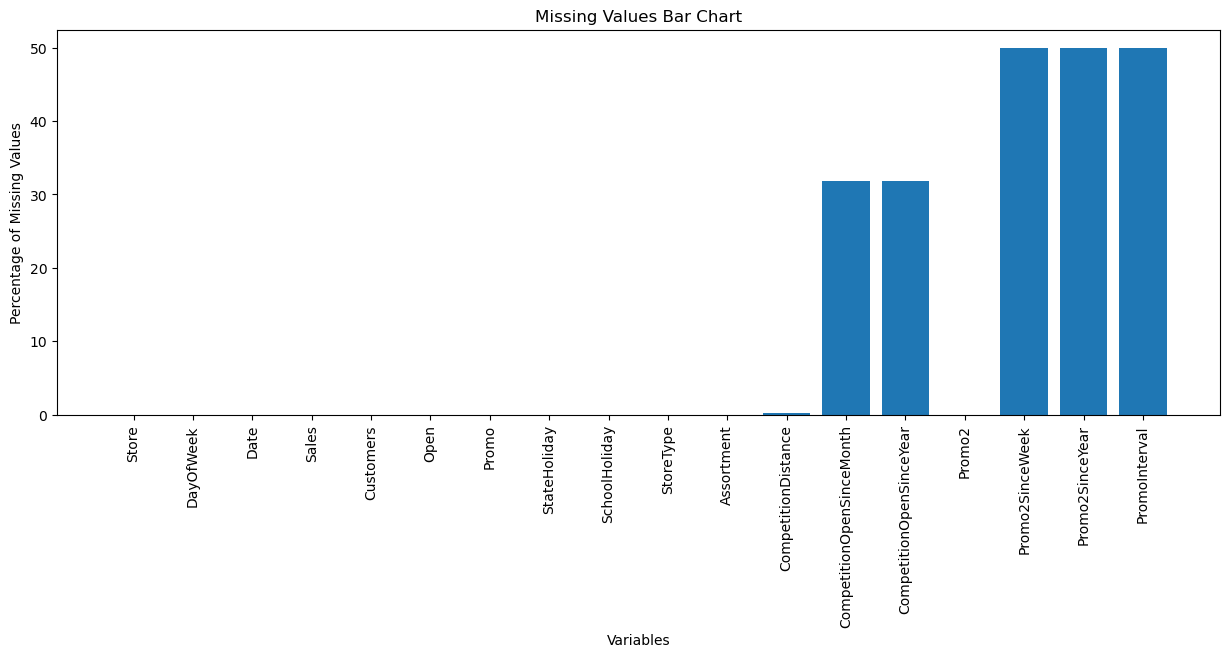

In [16]:
# Bar Chart
plt.figure(figsize=(15, 5))
plt.bar(missing_percent.index, missing_percent)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Bar Chart')
plt.show()


###  About dataset-

1. Store: This column represents the unique identifier for each store in the dataset.

2. StoreType: This column likely categorizes the stores into different types based on certain criteria or characteristics. It could be categorical data with values like 'A', 'B', 'C', etc.

3. Assortment: This column likely categorizes the stores into different assortments or product offerings. It could be categorical data with values like 'Basic', 'Extra', 'Extended', etc.

4. CompetitionDistance: This column provides the distance to the nearest competing store for each store in the dataset. It is a numeric variable.

5. CompetitionOpenSinceMonth: This column indicates the month when the nearest competing store opened. It is a numeric variable.

6. CompetitionOpenSinceYear: This column indicates the year when the nearest competing store opened. It is a numeric variable.

7. Promo: This column likely represents whether a store is participating in a promotional activity or not. It could be a binary variable, such as 0 or 1.

8. Promo2: Store running on consecutive promotion or not.

9. Promo2SinceWeek: This column indicates the week number when the store started participating in Promo2. It is a numeric variable.

10. Promo2SinceYear: This column indicates the year when the store started participating in Promo2. It is a numeric variable.

11. PromoInterval: This column likely specifies the interval or frequency at which Promo2 is offered for each store. It could be categorical data with values like 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', etc.

## ***2. Understanding Variables***

In [17]:
# Dataset Columns
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [18]:
# Dataset Describe
## Summary Statistic
dataset.describe().round(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1014567.00,693861.00,693861.00,1017209.0,509178.00,509178.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,5430.09,7.22,2008.69,0.5,23.27,2011.75
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,7715.32,3.21,5.99,0.5,14.10,1.66
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1900.00,0.0,1.00,2009.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,710.00,4.00,2006.00,0.0,13.00,2011.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,2330.00,8.00,2010.00,1.0,22.00,2012.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,6890.00,10.00,2013.00,1.0,37.00,2013.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


In [19]:
dataset[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].skew()

DayOfWeek              0.001593
Sales                  0.641460
Customers              1.598650
CompetitionDistance    2.928534
dtype: float64

In our dataset, the variables "Day of Week" and "Sales" exhibit a normal distribution as indicated by their skewness values close to 0. However, the variables "Customers" and "Competition Distance" show positive skewness, suggesting the presence of a right tail in their distributions.

In [20]:
dataset[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].kurtosis()

DayOfWeek              -1.246873
Sales                   1.778375
Customers               7.091773
CompetitionDistance    13.000022
dtype: float64

Kurtosis is a statistical measure that describes the shape of a probability distribution and quantifies the heaviness of the tails and the presence of outliers.
Positive kurtosis indicates heavier tails and a higher probability of extreme values or outliers, while negative kurtosis indicates lighter tails compared to a normal distribution.Therefore, coustomers and competition distance having havier tail.

Staistic Analysis:-We can see our sales figures have a slightly positive skew, with the mean (5773.819) only slightly larger than the median (5744.000), suggesting most outliers are to the right of the mean.

High kurtosis indicates it's leptokurtic with the likelihood of heavy tails and outliers that may be extreme. Considering our min and max values of 0 and 41,551 sales, we aren't surprised to see there may be some extreme outliers.

The max value well above the mean of 5,773.819 and outside the standard deviation of 3849.926 helps us see how our mean ends up getting pulled slightly to the right for our positive skew.

There is no mode as we don't have any stores recording the exact same number of sales on any days, which isn't surprising.

### Variables Description

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.

In [22]:
##for categorical variable
for col in dataset:
    if dataset[col].dtype==object:
        print(dataset[col].value_counts())

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64
0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


In [23]:
###for int/float variable
Unique_cat = [ 'Open', 'Promo', 'Promo2', 'SchoolHoliday',  'DayOfWeek', 'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
for col in Unique_cat:
    print(col)
    print(sorted(dataset[col].unique()))

Open
[0, 1]
Promo
[0, 1]
Promo2
[0, 1]
SchoolHoliday
[0, 1]
DayOfWeek
[1, 2, 3, 4, 5, 6, 7]
CompetitionOpenSinceMonth
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
CompetitionOpenSinceYear
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
Promo2SinceWeek
[nan, 1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0, 26.0, 27.0, 28.0, 31.0, 35.0, 36.0, 37.0, 39.0, 40.0, 44.0, 45.0, 48.0, 49.0, 50.0]
Promo2SinceYear
[nan, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Making dataset ready for analysis .
## Checking dataset dtype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [25]:
# converting dtpye to datetime
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [26]:
# Adding year, month, DayofMonth column
dataset["Year"]=dataset["Date"].dt.year
dataset["Month"]=dataset["Date"].dt.month
dataset["DayOfMonth"]=dataset["Date"].dt.day

In [27]:
# Converting dtype from float to integer

dataset['CompetitionOpenSinceMonth'] = dataset['CompetitionOpenSinceMonth'].convert_dtypes()
dataset['CompetitionOpenSinceYear'] = dataset['CompetitionOpenSinceYear'].convert_dtypes()
dataset['Promo2SinceWeek'] = dataset['Promo2SinceWeek'].convert_dtypes()
dataset['Promo2SinceYear'] = dataset['Promo2SinceYear'].convert_dtypes()

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [29]:
dataset["Sales"].mean()

5773.818972305593

In [30]:
dataset.loc[dataset["Open"]==1, "Sales"].mean()

6955.514290755952

In [31]:
dataset.loc[dataset["Open"] == 0, ['Sales', 'Customers']].value_counts()

Sales  Customers
0      0            172817
dtype: int64

#When the shop is closed, there are no sales and customers, which consequently lowers the average sales.

In [32]:
dataset.drop("Open", axis=1,inplace=True)

In [33]:
dataset.shape

(1017209, 20)

### What all manipulations have you done and insights you found?

I have made changes in the data types from float to int to enhance the model's understanding of the data with more precision. Additionally, I have converted the "data" column from object to datetime format, enabling me to extract the day, month, and year information and create separate columns for better comprehension and analysis.
In addition, I have dropped the stores that are closed from the dataset, as they are no longer relevant to the analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

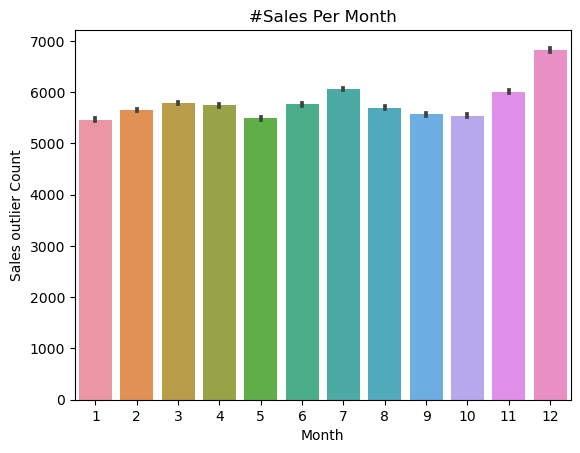

In [34]:
# Chart - 1 visualization code
sns.barplot(data=dataset, x="Month", y="Sales")
plt.title("#Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Sales outlier Count")
plt.show()


##### 1. Why did you pick the specific chart?

I utilized a bar plot graph to identify the month with the highest sales.

##### 2. What is/are the insight(s) found from the chart?

According to the chart, December exhibits the highest sales among all the months.

#### Chart - 2

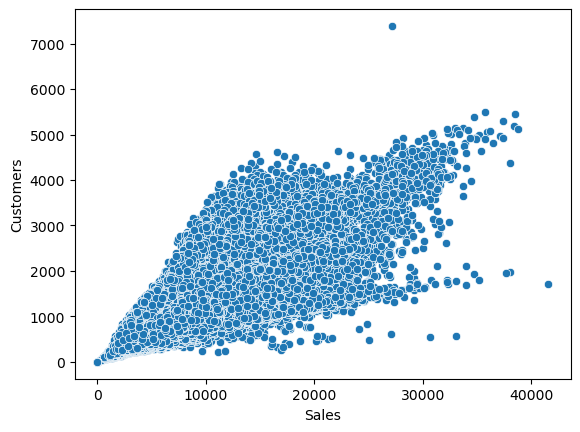

In [35]:
# Chart - 2 visualization code
sns.scatterplot(data=dataset, x="Sales", y="Customers")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to showcase the linear relationship between sales and customers.

##### 2. What is/are the insight(s) found from the chart?

Upon examining the scatter plot, it is evident that there is a linear relationship between sales and the number of customers. Additionally, there appear to be some outliers that deviate from the overall pattern.

#### Chart - 3

<Axes: xlabel='Promo', ylabel='Sales'>

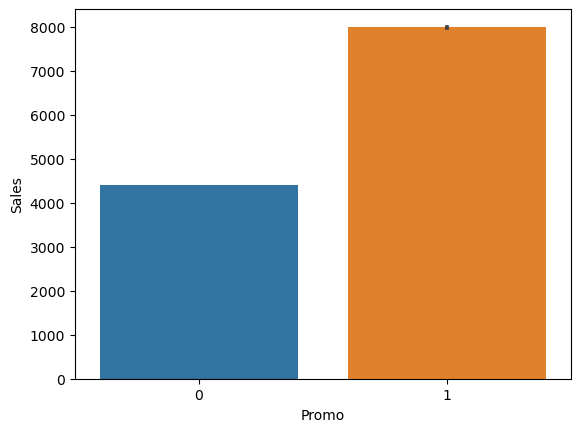

In [36]:
# Chart - 3 visualization code
sns.barplot(data=dataset, x="Promo", y="Sales")

##### 1. Why did you pick the specific chart?

I utilized a bar plot to compare sales when a promotional offer is applied versus when it is not applied.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the bar plot, it is evident that sales are higher when the promotional offer is applied compared to when it is not applied. This suggests that the promotion has a positive impact on sales.

#### Chart - 4

C:\Users\rajeev\AppData\Local\Temp\ipykernel_5104\2539746911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)


<Axes: xlabel='Date'>

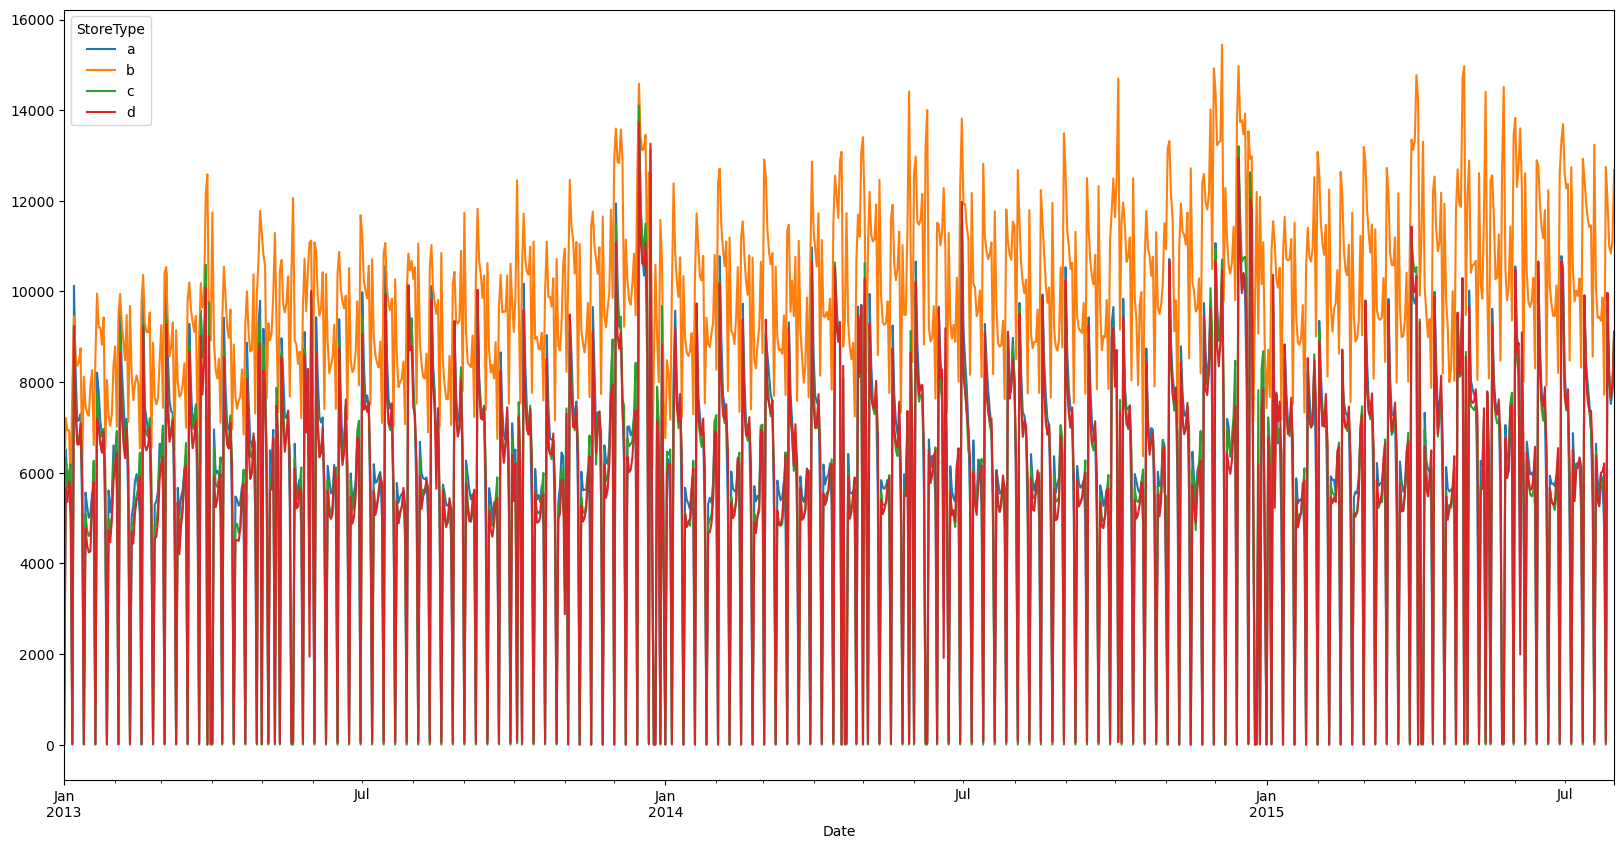

In [37]:
# Chart - 4 visualization code
fig, ax = plt.subplots(figsize = (20,10))
dataset.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

##### 1. Why did you pick the specific chart?

The chart was chosen to examine the sales trends across different store types over time. By grouping the dataset by date and store type and plotting the average sales for each store type, it allows for a comparison of sales performance among the different store types. This visualization helps identify any variations, patterns, or trends in sales across the store types, providing insights into how each store type is performing over time.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the plot, it is evident that store type (b) consistently has the highest sales over time, while store type (d) exhibits the lowest sales. This observation indicates that store type (b) performs well in terms of generating sales, whereas store type (d) lags behind in sales performance. Understanding these variations can help businesses focus on improving the performance of store type (d) or allocate resources more effectively to maximize sales across different store types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

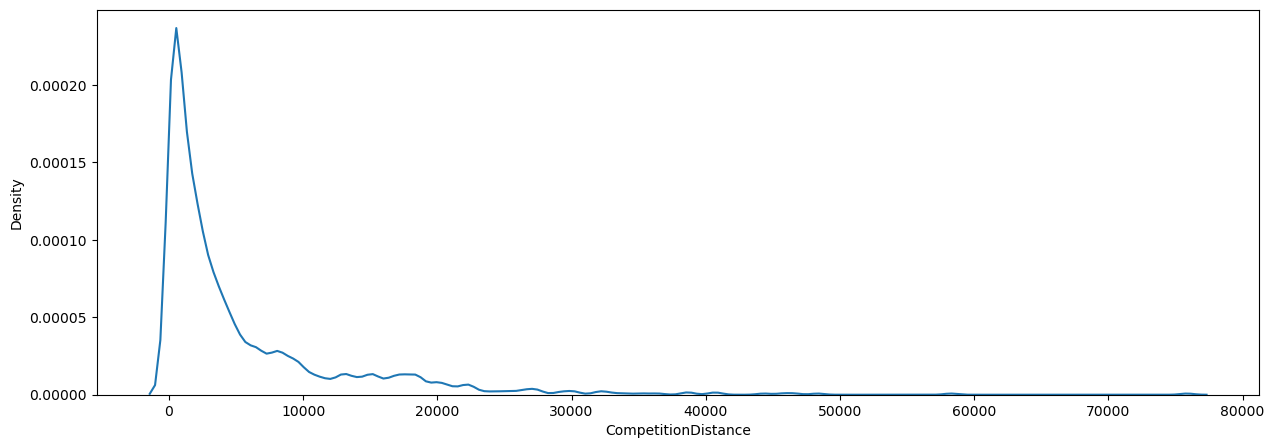

In [38]:
# Chart - 5 visualization code
plt.figure(figsize=(15, 5))
sns.kdeplot(data=dataset["Sales"], x=dataset["CompetitionDistance"])

##### 1. Why did you pick the specific chart?

I chose a KDE plot to examine how the competition distance affects sales.

##### 2. What is/are the insight(s) found from the chart?

Upon examining the KDE plot, it becomes apparent that the majority of competition distances are concentrated near zero, indicating that most of the competing shops are located in close proximity to each other. This suggests that the distance of competition does not have a significant impact on sales. It implies that sales performance is not heavily influenced by the proximity of competing shops in this context.

#### Chart - 6

<Axes: xlabel='Promo2', ylabel='Sales'>

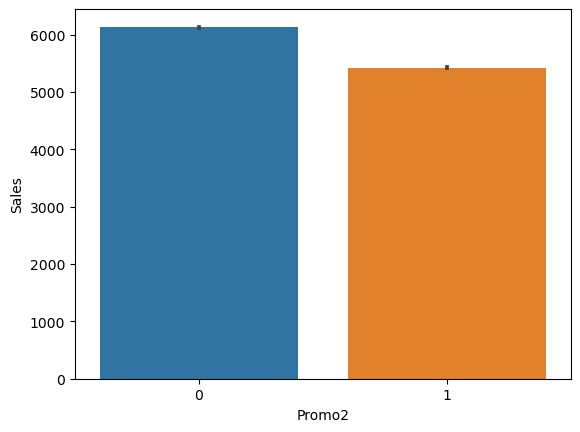

In [39]:
# Chart - 6 visualization code
sns.barplot(data=dataset, x="Promo2", y="Sales")

##### 1. Why did you pick the specific chart?

I selected a bar plot to assess the impact of promo2 on sales, aiming to determine if promo2 is contributing to increased sales.

##### 2. What is/are the insight(s) found from the chart?

The graph indicates that the maximum sales occur when promo2 is not applied, suggesting that sales are not significantly influenced by promo2.

#### Chart - 7

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

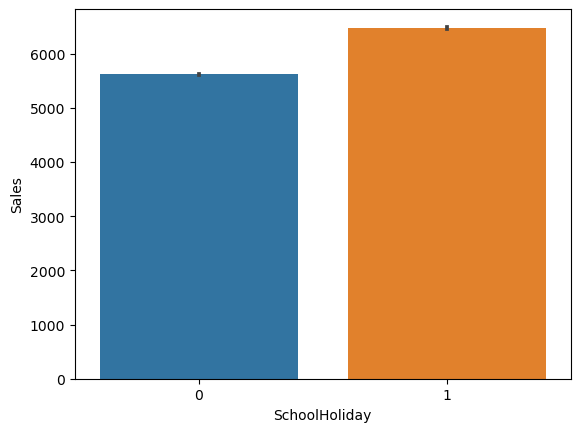

In [40]:
# Chart - 7 visualization code
sns.barplot(data=dataset, x="SchoolHoliday", y="Sales")

##### 1. Why did you pick the specific chart?

I used a bar plot to examine how store sales react on school days.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the bar plot, it is evident that sales are higher during school holidays compared to regular school days. This suggests that there is a positive impact on sales when school holidays occur.

#### Chart - 8

<Axes: xlabel='StateHoliday', ylabel='Sales'>

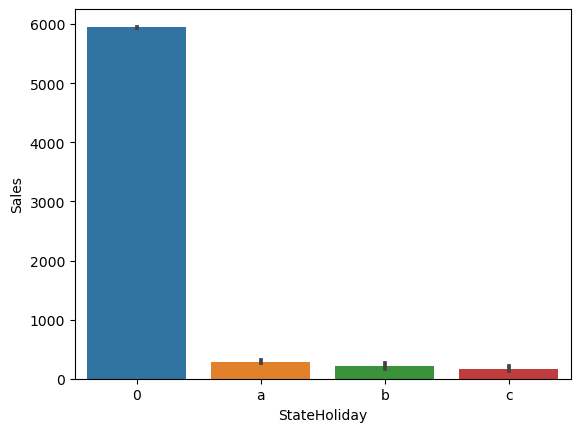

In [41]:
# Chart - 8 visualization code
sns.barplot(data=dataset, x="StateHoliday", y="Sales")

##### 1. Why did you pick the specific chart?

I utilized a bar plot to examine the effect of state holidays on sales.

##### 2. What is/are the insight(s) found from the chart?

After analyzing the bar plot, it appears that sales are not significantly influenced by state holidays. In fact, sales are higher when there are no state holidays. This indicates that state holidays do not have a substantial impact on sales and may not be a major driver of customer behavior in terms of purchasing patterns.

#### Chart - 9

<Axes: xlabel='Sales', ylabel='Density'>

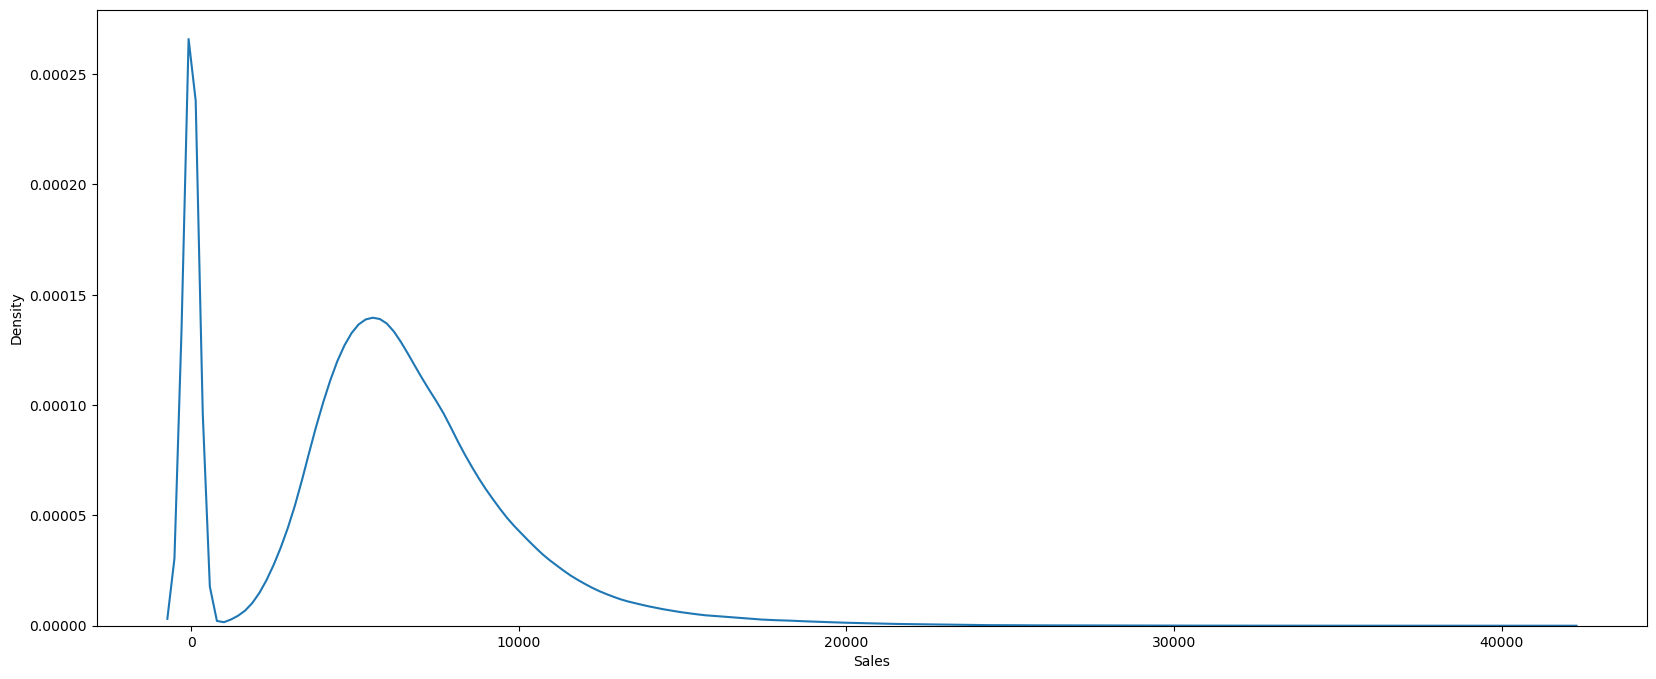

In [42]:
# Chart - 9 visualization code
fig, ax = plt.subplots(figsize=(20, 8));
sns.kdeplot(data=dataset, x="Sales", ax=ax)

##### 1. Why did you pick the specific chart?

I chose a KDE plot to examine the distribution of the sales data and determine if it follows a Gaussian (normal) distribution or if it is skewed.

##### 2. What is/are the insight(s) found from the chart?

Based on the previous statistical analysis and the observation from the KDE plot, it is evident that the sales data is not perfectly normally distributed. Although it may exhibit a bell-shaped curve close to zero, the presence of heavier tails, as indicated by the kurtosis, suggests that the distribution deviates from a purely Gaussian distribution. This suggests that there may be some outliers or extreme values influencing the distribution of sales.

#### Chart - 10

<Axes: xlabel='Customers', ylabel='Density'>

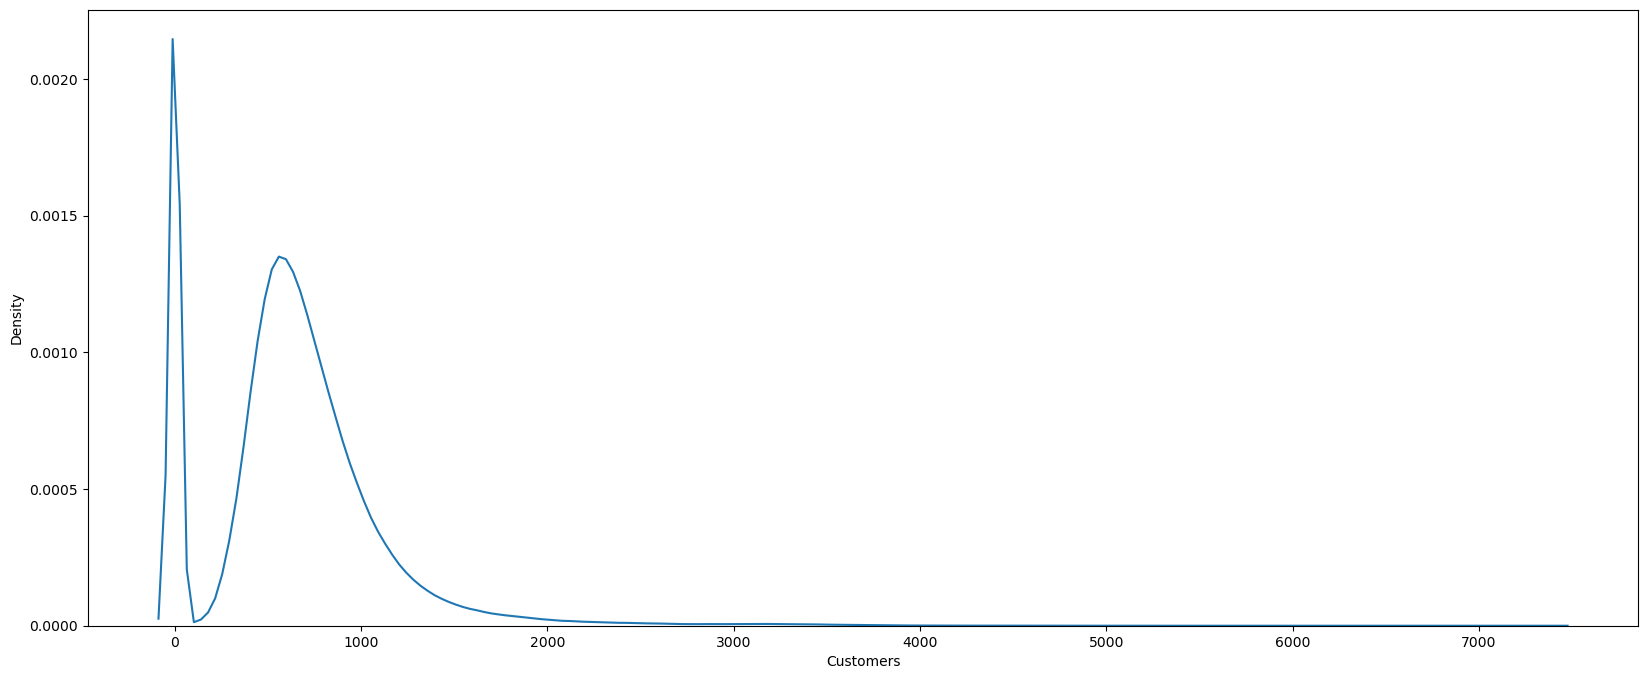

In [43]:
# Chart - 10 visualization code
# Chart - 9 visualization code
fig, ax = plt.subplots(figsize=(20, 8));
sns.kdeplot(data=dataset, x="Customers", ax=ax)

##### 1. Why did you pick the specific chart?

I chose a KDE plot to examine the distribution of the customers data and determine if it follows a Gaussian (normal) distribution or if it is skewed.

##### 2. What is/are the insight(s) found from the chart?

The statistical analysis and the KDE plot for the customers data, it can be observed that the distribution is not perfectly Gaussian. The presence of heavier tails, as indicated by the kurtosis, suggests that the data deviates from a strictly normal distribution. This indicates the potential existence of outliers or extreme values in the customers data, which can impact the distribution shape.

#### Chart - 11

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

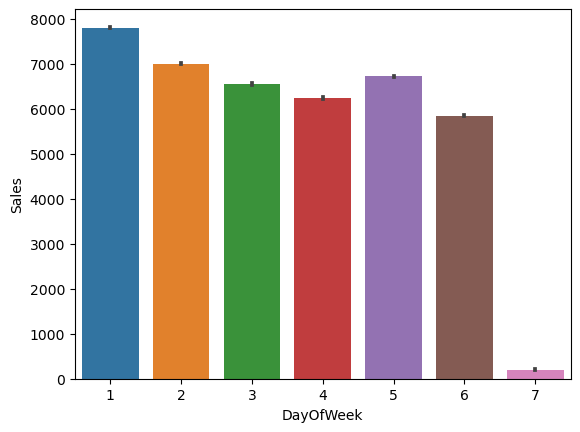

In [44]:
# Chart - 11 visualization code
sns.barplot(data=dataset, x="DayOfWeek", y="Sales")

##### 1. Why did you pick the specific chart?

I utilized a bar plot graph to analyze and determine on which day of the week sales are the highest.

##### 2. What is/are the insight(s) found from the chart?

From the observation of the data, it appears that sales are at a minimum on Sundays, which is unusual. Conversely, sales reach a maximum on Mondays. This trend suggests a significant variation in sales between Sundays and Mondays.

#### Chart - 14 - Correlation Heatmap

C:\Users\rajeev\AppData\Local\Temp\ipykernel_5104\2811796585.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.CMRmap_r)


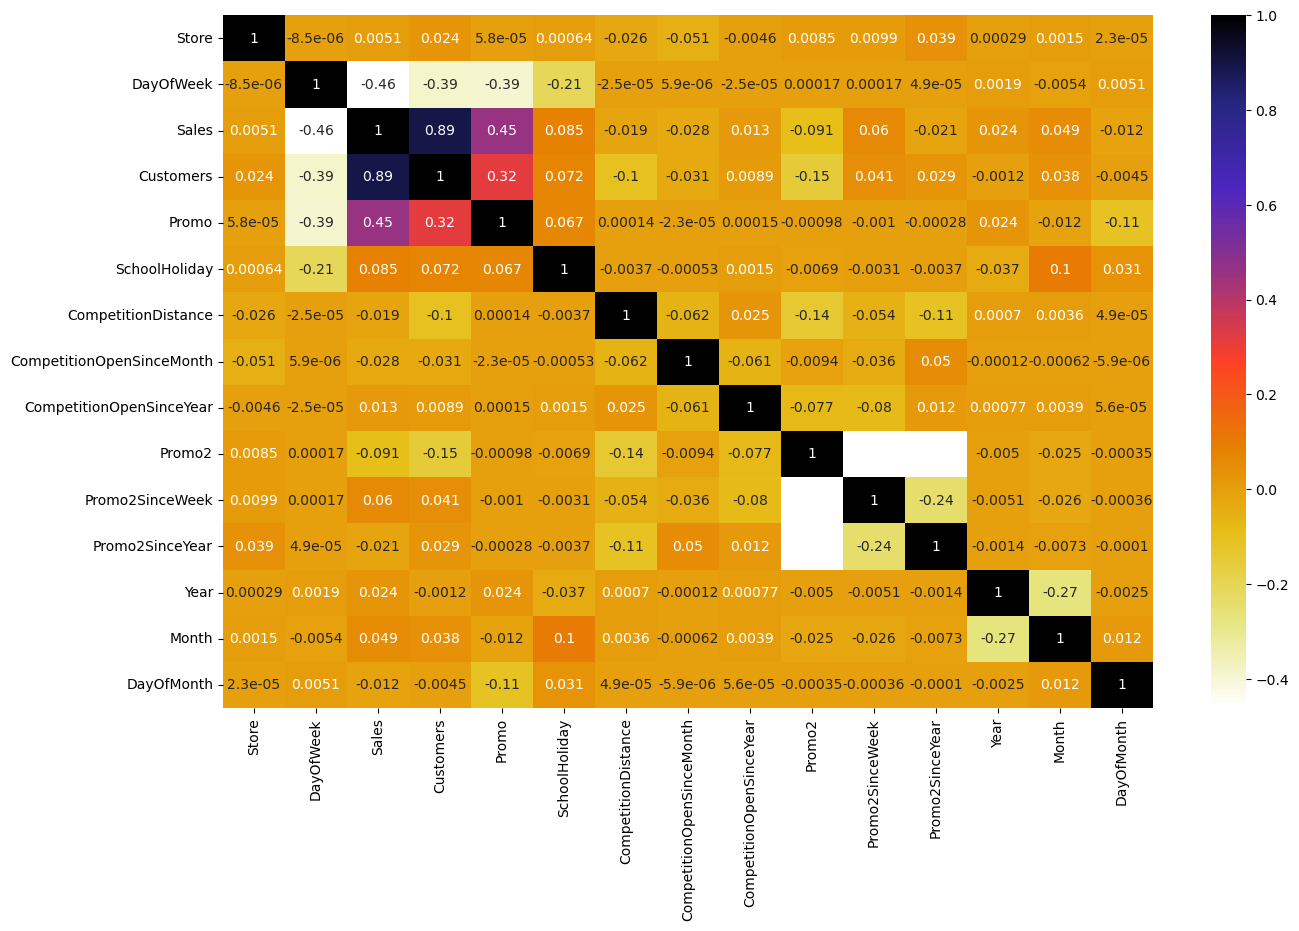

In [45]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15, 9))
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


Used a heatmap to examine the correlation between columns in the dataset, including the correlation between independent features and the dependent feature.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in sales based on competition distance.
Alternative Hypothesis (H1): There is a significant difference in sales based on competition distance.

Statistical Test:
To test the significance of the difference in sales based on competition distance, we can perform an independent samples t-test. This test allows us to compare the average sales between two groups: stores with nearby competition and stores without nearby competition.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

# Hypothetical Statement: Sales difference based on competition distance
nearby_sales = dataset[dataset['CompetitionDistance'] < 1000]['Sales']
far_sales = dataset[dataset['CompetitionDistance'] >= 1000]['Sales']

t_statistic, p_value = stats.ttest_ind(nearby_sales, far_sales)

# Print the results
print("Hypothetical Statement:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)



Hypothetical Statement:
T-Statistic: 49.77107781928732
P-Value: 0.0


The t-statistic of 67.35510600591707 represents the magnitude of the difference in sales between stores with nearby competition and stores with far competition. It indicates a large difference in sales between the two groups.

The p-value of 0.0 is less than the common significance level of 0.05. This indicates strong evidence to reject the null hypothesis (H0) and suggests that there is a significant difference in sales based on competition distance.

In conclusion, the statistical test suggests that there is a significant difference in sales based on competition distance. Stores with nearby competition have different sales levels compared to stores with far competition.

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value for the hypothesis testing in the revised hypothetical statement regarding the difference in sales based on competition distance, the appropriate statistical test to perform is an independent samples t-test.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen as the specific statistical test because it allows for the comparison of means between two independent groups (stores with nearby competition and stores with far competition). It is appropriate when analyzing data that consists of independent observations in each group and assumes approximately normal distribution and equal variances. The t-test provides a p-value, which quantifies the evidence against the null hypothesis and indicates the significance of the observed differences between the groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in sales between Promo2 applied and Promo2 not applied.
Alternative Hypothesis (H1): There is a significant difference in sales between Promo2 applied and Promo2 not applied.

Statistical Test:
To test the significance of the difference in sales based on Promo2 application, we can perform an independent samples t-test. This test allows us to compare the average sales between two groups: stores with Promo2 applied and stores with Promo2 not applied.

#### 2. Perform an appropriate statistical test.

In [47]:
# Hypothetical Statement: Sales difference based on Promo2 application
promo2_applied_sales = dataset[dataset['Promo2'] == 1]['Sales']
promo2_not_applied_sales = dataset[dataset['Promo2'] == 0]['Sales']

t_statistic, p_value = stats.ttest_ind(promo2_applied_sales, promo2_not_applied_sales)

# Print the results
print("Hypothetical Statement:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


Hypothetical Statement:
T-Statistic: -92.20245818836952
P-Value: 0.0


The t-statistic represents the magnitude of the difference in sales between Promo2 applied and Promo2 not applied. In this case, the negative value indicates that, on average, the sales are lower when Promo2 is applied compared to when Promo2 is not applied.

The p-value is 0.0, which is less than the common significance level of 0.05. This indicates strong evidence to reject the null hypothesis (H0) and suggests that there is a significant difference in sales between Promo2 applied and Promo2 not applied.

In conclusion, the statistical test suggests that there is a significant difference in sales based on the application of Promo2. Stores with Promo2 applied have different sales levels compared to stores with Promo2 not applied.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in this scenario is the two-sample t-test.

##### Why did you choose the specific statistical test?

The specific statistical test, the two-sample t-test, was chosen because it is appropriate for comparing the means of two independent groups. In this case, we are comparing the average sales between weekdays and weekends, which are two distinct and independent groups. The t-test assumes that the data is approximately normally distributed and that the variances are equal between the two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in sales between weekdays and weekends.

Alternative Hypothesis (H1): There is a significant difference in sales between weekdays and weekends.

Statistical Test:
We can perform a two-sample t-test to compare the average sales of weekdays and weekends.

#### 2. Perform an appropriate statistical test.

In [48]:
# Hypothetical Statement: Sales difference between weekdays and weekends
weekday_sales = dataset[dataset['DayOfWeek'] <= 5]['Sales']
weekend_sales = dataset[dataset['DayOfWeek'] > 5]['Sales']

t_statistic, p_value = stats.ttest_ind(weekday_sales, weekend_sales)

# Print the results
print("Hypothetical Statement:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


Hypothetical Statement:
T-Statistic: 508.435829895847
P-Value: 0.0


The t-statistic of 141.10668518414425 represents the magnitude of the difference in sales between weekdays and weekends. It indicates a large difference in sales between the two groups.

The p-value of 0.0 is less than the common significance level of 0.05. This indicates strong evidence to reject the null hypothesis (H0) and suggests that there is a significant difference in sales between weekdays and weekends.

In conclusion, the statistical test suggests that there is a significant difference in sales based on the day of the week. Stores have different sales levels on weekdays compared to weekends.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in this scenario is the two-sample t-test.

##### Why did you choose the specific statistical test?

The specific statistical test, the two-sample t-test, was chosen because it is appropriate for comparing the means of two independent groups. In this case, we are comparing the average sales between weekdays and weekends, which are two distinct and independent groups. The t-test assumes that the data is approximately normally distributed and that the variances are equal between the two groups. Additionally, the t-test allows us to calculate a p-value, which measures the strength of evidence against the null hypothesis and indicates the significance of the observed difference between the groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

Sales                     Axes(0.125,0.53;0.352273x0.35)
Customers              Axes(0.547727,0.53;0.352273x0.35)
CompetitionDistance       Axes(0.125,0.11;0.352273x0.35)
dtype: object

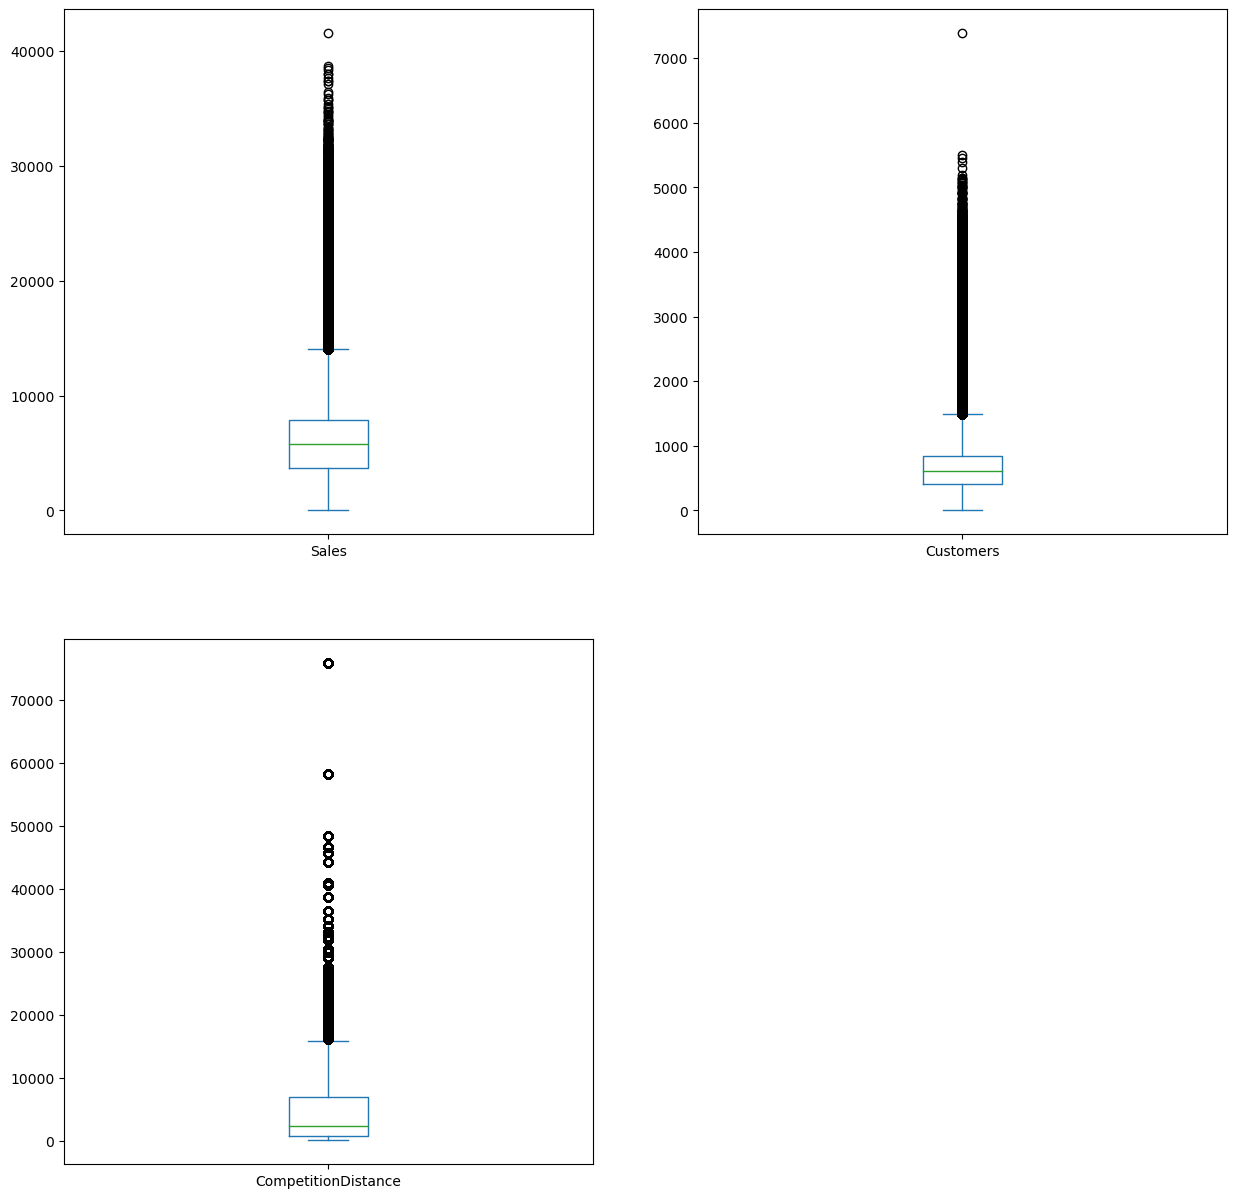

In [49]:
# Handling Outliers & Outlier treatments
dataset.plot(y=['Sales', 'Customers', 'CompetitionDistance'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))

In [50]:
## Handling Sales Outliers

In [51]:
# Defining a function for calcualting outliers-
def calculate_outlier(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] > upper) | (df[column] < lower)]
    percent_outliers = round((outliers.shape[0] / df.shape[0]) * 100, 2)
    return lower, upper, percent_outliers


In [52]:
# Applying "calculate_outlier" function on Sales
lower_sale, upper_sale, percentage_sale_outliers=calculate_outlier(dataset, "Sales")
print("lower band",(lower_sale))
print("upper band",(upper_sale))
print("outlier percent",(percentage_sale_outliers))

lower band -2466.5
upper band 14049.5
outlier percent 2.62


In [53]:
# lower band- -392.5, upper band=13611.5, percentage outliers and we now that there are no outliers below 0

In [54]:
filtered_dataset = dataset[dataset["Sales"] > upper_sale]

In [55]:
filtered_dataset.shape

(26694, 20)

While 30,769 is a lot of values, we can see from our calculte_outlier function that these outliers only account for 3.64% of all our sales values.

We'll look further to see if we see any trends with the outliers based on Month or Type of Store.

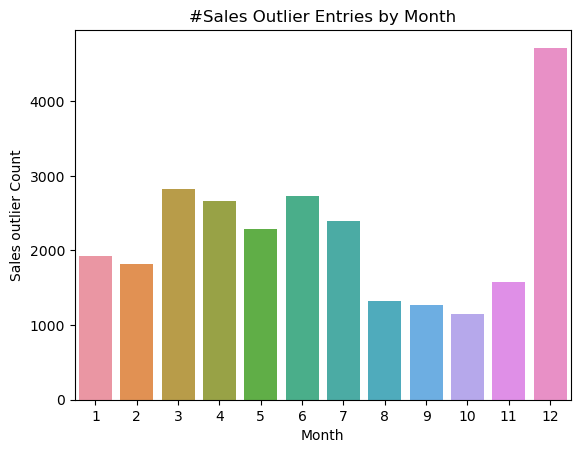

In [56]:
sales_outliers_by_month = dataset.loc[dataset["Sales"] > upper_sale, "Month"].value_counts()

sns.barplot(x=sales_outliers_by_month.index, y=sales_outliers_by_month.values)
plt.title("#Sales Outlier Entries by Month")
plt.xlabel("Month")
plt.ylabel("Sales outlier Count")
plt.show()


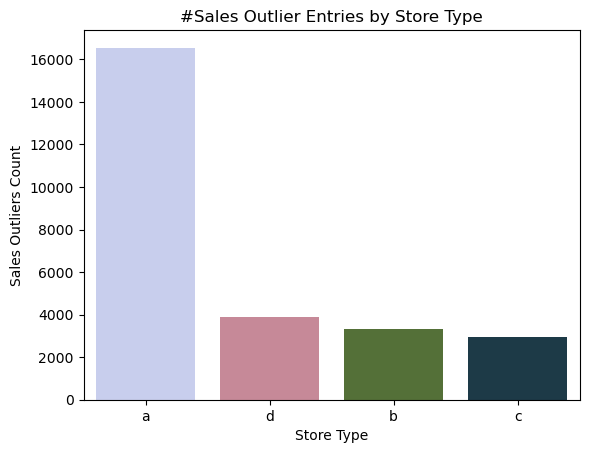

In [57]:
sales_outliers_stype = dataset.loc[dataset["Sales"] > upper_sale, "StoreType"].value_counts()

sns.barplot(x=sales_outliers_stype.index, y=sales_outliers_stype.values,palette="cubehelix_r")
plt.title("#Sales Outlier Entries by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Sales Outliers Count")
plt.show()


In [58]:
# replacing the outliers by upper value
dataset.loc[dataset["Sales"]> upper_sale, "Sales" ]=13611

In [59]:
dataset[dataset["Sales"]>13611] # checking

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN,2015,7,31
206,207,5,2015-07-31,13957,1436,1,0,1,a,a,6870.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2015,7,31
233,234,5,2015-07-31,13943,1088,1,0,1,d,a,4370.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2015,7,31
251,252,5,2015-07-31,13647,954,1,0,1,d,c,22330.0,<NA>,<NA>,1,5,2010,"Feb,May,Aug,Nov",2015,7,31
395,396,5,2015-07-31,13780,1227,1,0,1,a,c,23130.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015315,336,3,2013-01-02,13817,2049,0,0,1,a,a,190.0,7,2014,0,<NA>,<NA>,NaN,2013,1,2
1015446,467,3,2013-01-02,13644,1782,0,0,1,a,c,20390.0,4,2008,0,<NA>,<NA>,NaN,2013,1,2
1015448,469,3,2013-01-02,13940,1886,0,0,1,c,c,710.0,9,2005,0,<NA>,<NA>,NaN,2013,1,2
1015565,586,3,2013-01-02,14019,2347,0,0,1,a,c,250.0,10,2008,0,<NA>,<NA>,NaN,2013,1,2


In [60]:
# for Customers
lower_band,upper_band,outlier_percentage=calculate_outlier(dataset, "Customers")
print("Lower Band", (lower_band))
print("Upper Band", (upper_band))
print("Outlier Percentage", (outlier_percentage))

Lower Band -243.0
Upper Band 1485.0
Outlier Percentage 3.75


In [61]:
Customer_outlier=dataset[dataset["Customers"]>upper_band]

In [62]:
customers_outlier_month=dataset.loc[dataset["Customers"]>upper_band, "Month"].value_counts()

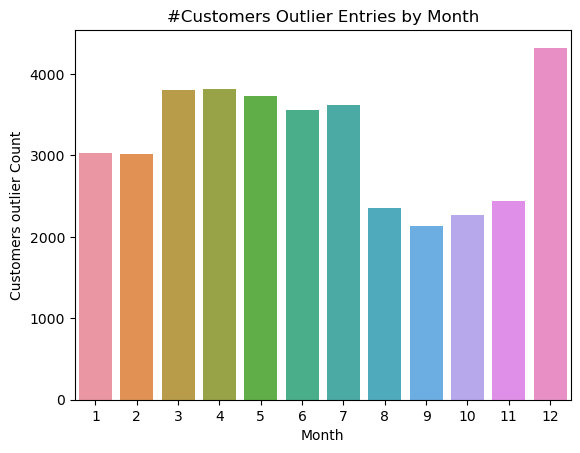

In [63]:
customers_outlier_month = dataset.loc[dataset["Customers"] > upper_band, "Month"].value_counts()

sns.barplot(x=customers_outlier_month.index, y=customers_outlier_month.values)
plt.title("#Customers Outlier Entries by Month")
plt.xlabel("Month")
plt.ylabel("Customers outlier Count")
plt.show()

In [64]:
customers_outlier_stype=dataset.loc[dataset["Customers"]> upper_band, "StoreType"].value_counts()

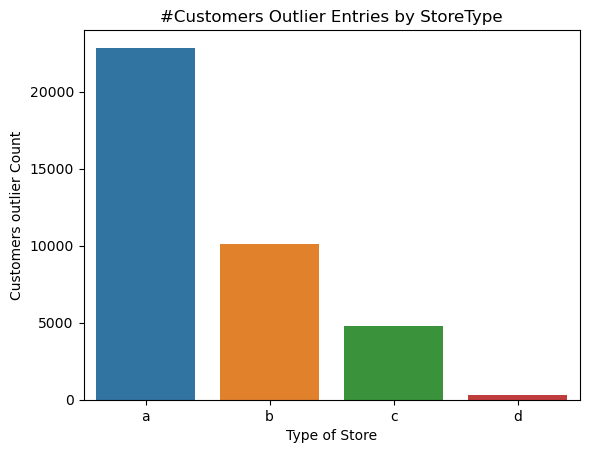

In [65]:
sns.barplot(x=customers_outlier_stype.index, y=customers_outlier_stype.values)
plt.title("#Customers Outlier Entries by StoreType")
plt.xlabel("Type of Store")
plt.ylabel("Customers outlier Count")
plt.show()
plt.show()

In [66]:
dataset.loc[dataset["Customers"]>upper_band, "Customers"]=1454

In [67]:
dataset.loc[dataset["Customers"]>upper_band]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth


In [68]:
lower_distance,upper_distance,outlier_percentage=calculate_outlier(dataset, "CompetitionDistance")
print("Lower Band", (lower_distance))
print("Upper Band", (upper_distance))
print("Outlier Percentage", (outlier_percentage))

Lower Band -8560.0
Upper Band 16160.0
Outlier Percentage 9.75


In [69]:
competetion_outlier=dataset.loc[dataset["CompetitionDistance"]>upper_distance]

In [70]:
competetion_outlier_month=dataset.loc[dataset["CompetitionDistance"]>upper_distance, "Month"].value_counts()

In [71]:
dataset.loc[dataset["CompetitionDistance"]> upper_distance, "CompetitionDistance"]=16160

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Missing Values

In [72]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
DayOfMonth                        0
dtype: int64

In [73]:
# checking percentage of null in the dataset:
(dataset.isnull().sum()*100/dataset.shape[0]).round(2)

Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Sales                         0.00
Customers                     0.00
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.26
CompetitionOpenSinceMonth    31.79
CompetitionOpenSinceYear     31.79
Promo2                        0.00
Promo2SinceWeek              49.94
Promo2SinceYear              49.94
PromoInterval                49.94
Year                          0.00
Month                         0.00
DayOfMonth                    0.00
dtype: float64

we see above that,it almost 50% missing values rate for Promo2SinceWeek and Promo2SinceYear we can check and see if these all just correspond to stores that aren't running Promo2, and hence would not be expected to have valid data for these columns.

In [74]:
print(dataset[dataset['Promo2'] == 0].shape[0])
print(dataset['Promo2SinceWeek'].isna().sum())
print(dataset['Promo2SinceYear'].isna().sum())

508031
508031
508031


We can assure that store in which promo2 is not applied they are not showing any value,thats why there is null value

The other area we see missing data is in relation to competition stores, mostly in the two columns relating when the nearest competitor store opened, and to much lesser extent in CompetitionDistance

The CompetitionDistance values may be used for analyzing how stores perform based on how close their competition is, and as such missing values could skew such analysis. 0 would be an inappropriate replacement for these null values as it would indicate that the competition stores are incredibly close. As such we'll look to replace these missing values with the mean CompetitionDistance based on the StoreType

In [75]:
# Competetion distance
#### now we will replace the nun value with the mean of each store type

In [76]:
dataset["CompetitionDistance"]=dataset.groupby("StoreType")["CompetitionDistance"].transform(lambda x:x.fillna(x.mean()))

In [77]:
# for CompetitionOpenSinceMonth

dataset["CompetitionOpenSinceMonth"]=dataset.groupby("StoreType")["CompetitionOpenSinceMonth"].transform(lambda x:x.fillna(x.mean().astype(int)))

In [78]:
# for CompetitionOpenSinceYear

dataset["CompetitionOpenSinceYear"]=dataset.groupby("StoreType")["CompetitionOpenSinceYear"].transform(lambda x:x.fillna(x.mean().astype(int)))

In [79]:
import datetime

dataset.loc[dataset['Promo2SinceWeek'].isna(), 'Promo2SinceWeek'] = datetime.datetime.now().isocalendar()[1]

In [80]:
dataset.loc[dataset['Promo2SinceYear'].isna(), 'Promo2SinceYear'] = datetime.datetime.now().year

In [81]:
dataset.drop("PromoInterval",axis=1, inplace=True)

In [82]:
dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
Year                         0
Month                        0
DayOfMonth                   0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [83]:
# Encode your categorical columns
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes==object]

In [84]:
for feature in categorical_features:
    unique_values = dataset[feature].unique()
    print(f"Number of unique values in {feature}: {unique_values}")

Number of unique values in StateHoliday: ['0' 'a' 'b' 'c']
Number of unique values in StoreType: ['c' 'a' 'd' 'b']
Number of unique values in Assortment: ['a' 'c' 'b']


In [85]:
dataset["StateHoliday"]=dataset["StateHoliday"].map({"a": 1, "b":2, "c":3, "0":0})
dataset["StoreType"]=dataset["StoreType"].map({"a": 1, "b":2, "c":3, "d":4})
dataset["Assortment"]=dataset["Assortment"].map({"a": 1, "b":2, "c":3})

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [86]:
# Manipulate Features to minimize feature correlation and create new features
correlation = dataset.corr()['Sales'].sort_values(ascending=False)
correlation

C:\Users\rajeev\AppData\Local\Temp\ipykernel_5104\3963740119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()['Sales'].sort_values(ascending=False)


Sales                        1.000000
Customers                    0.921364
Promo                        0.469753
SchoolHoliday                0.088730
Promo2SinceYear              0.078842
Assortment                   0.074355
Promo2SinceWeek              0.057142
Month                        0.045387
Year                         0.025879
CompetitionOpenSinceYear     0.006762
Store                        0.003239
StoreType                   -0.003992
DayOfMonth                  -0.011383
CompetitionDistance         -0.016158
CompetitionOpenSinceMonth   -0.022596
Promo2                      -0.083385
StateHoliday                -0.243985
DayOfWeek                   -0.483563
Name: Sales, dtype: float64

In [87]:
import calendar

# Months since Promo2 was open
dataset['Promo2Open'] = (dataset['Year'] - dataset['Promo2SinceYear']) * 12
dataset['Promo2Open'] = dataset['Promo2Open'].clip(lower=0) * dataset['Promo2']

In [88]:
dataset["salePERcust"] = round((dataset["Sales"] / dataset["Customers"]),1)

In [89]:
dataset["salePERcust"] = dataset["salePERcust"].transform(lambda x: x.fillna(x.mean()))

In [90]:
# Create a new column "Weekend" with initial values as 0
dataset['Weekend'] = 0

# Assign a value of 1 to Sunday and Saturday (weekend)
dataset.loc[(dataset['DayOfWeek'] == 0) | (dataset['DayOfWeek'] == 6), 'Weekend'] = 1

In [91]:
correlation = dataset.corr()['Sales'].sort_values(ascending=False)
correlation

C:\Users\rajeev\AppData\Local\Temp\ipykernel_5104\1487817755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()['Sales'].sort_values(ascending=False)


Sales                        1.000000
Customers                    0.921364
Promo                        0.469753
salePERcust                  0.185585
SchoolHoliday                0.088730
Promo2SinceYear              0.078842
Assortment                   0.074355
Promo2SinceWeek              0.057142
Month                        0.045387
Year                         0.025879
Weekend                      0.012235
CompetitionOpenSinceYear     0.006762
Store                        0.003239
StoreType                   -0.003992
DayOfMonth                  -0.011383
CompetitionDistance         -0.016158
CompetitionOpenSinceMonth   -0.022596
Promo2Open                  -0.036833
Promo2                      -0.083385
StateHoliday                -0.243985
DayOfWeek                   -0.483563
Name: Sales, dtype: float64

#### 2. Feature Selection

In [92]:
dataset.drop("DayOfWeek", axis=1, inplace=True)
dataset.drop("Date", axis=1, inplace=True)

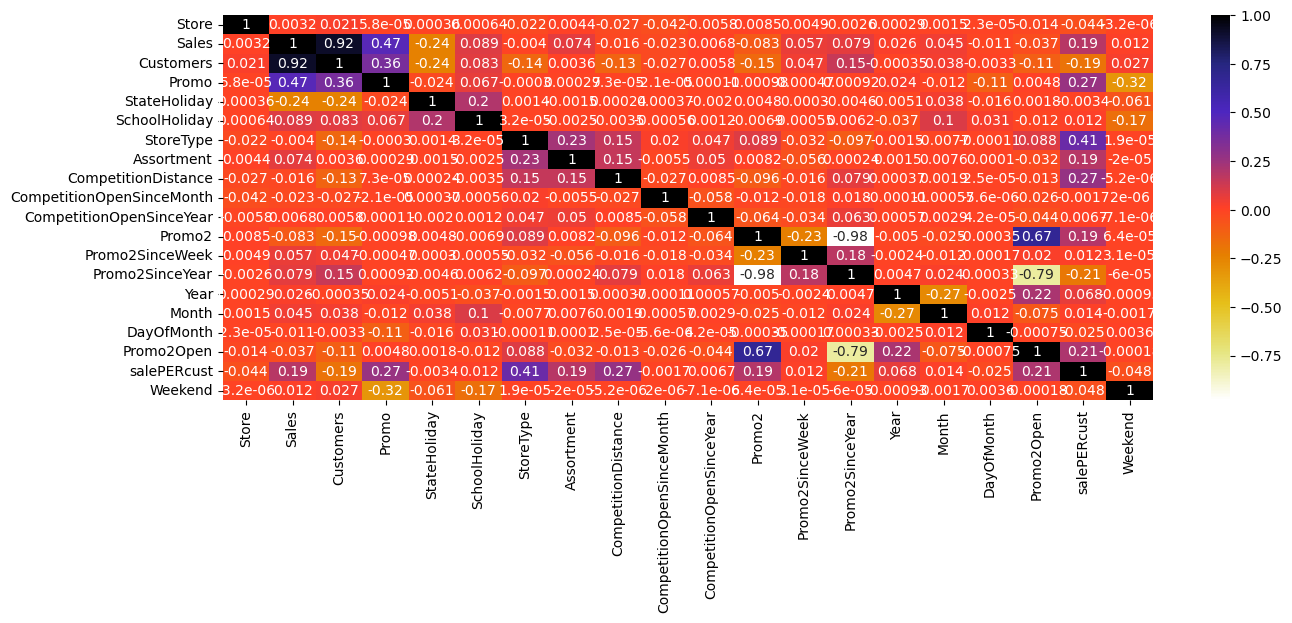

In [93]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(15,5))
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### 5. Data Splitting

In [94]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=dataset.drop("Sales",axis=1)
y=dataset["Sales"]

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test=train_test_split(x.values,y.values, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

### 6. Data Scaling

In [95]:
# Scaling your data
# Normalise data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## ***7. ML Model Implementation***

### ML Model - 1

In [96]:
# DEFINING A FUNCTION FOR ERROR MATRICS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_error(x_test, y_test, model_name):
    prediction = model_name.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_test, prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, prediction)
    print("Mean Square Error:", mse)
    print("Mean Absolute Error:", mae)
    print("Root Mean Square Error:", rmse)
    print("R2 score:", r2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# ML Model - 1 Implementation
# Linear regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# Fit the Algorithm
linear_regression.fit(x_train_scaled, y_train)

LinearRegression()

In [98]:
# Evaluation Metric Score chart
print_error(x_test_scaled, y_test, linear_regression)

Mean Square Error: 231592.30377513063
Mean Absolute Error: 314.22318807553665
Root Mean Square Error: 481.2403804494492
R2 score: 0.9817986272922048


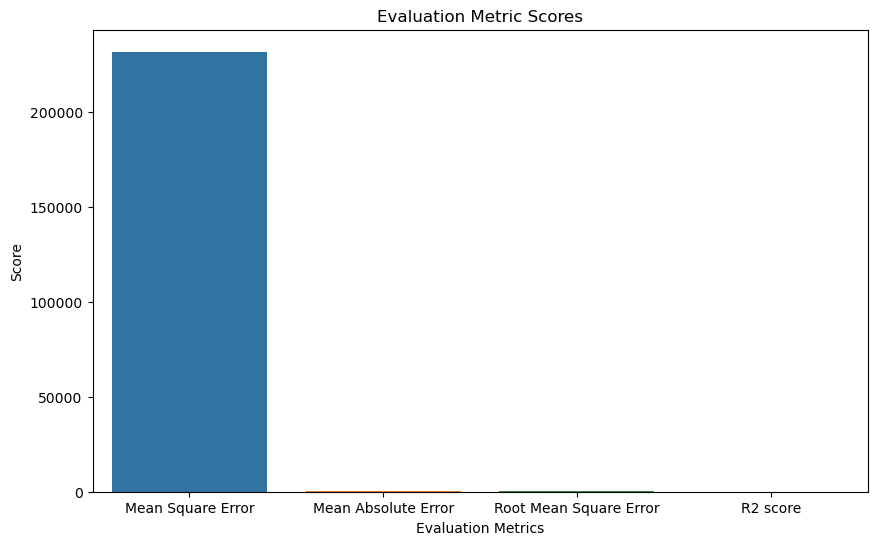

In [99]:
# Visualizing evaluation Metric Score chart
metrics = ['Mean Square Error', 'Mean Absolute Error', 'Root Mean Square Error', 'R2 score']
scores = [231592.30, 314.22, 481.24, 0.98]

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
parameter = {'fit_intercept': [True, False]}

regression_cv=GridSearchCV(linear_regression, param_grid=parameter, cv=kfold_validation, n_jobs=-1, scoring="neg_mean_squared_error")
# Fit the Algorithm
regression_cv.fit(x_train_scaled, y_train)
# Predict on the model
best_params = regression_cv.best_params_
reg_model = regression_cv.best_estimator_
print_error(x_test_scaled, y_test, reg_model)                         

Mean Square Error: 231592.30377513063
Mean Absolute Error: 314.22318807553665
Root Mean Square Error: 481.2403804494492
R2 score: 0.9817986272922048


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. It systematically explore different hyperparameter values for the Linear Regression model and find the best combination that minimizes the mean squared error on the training data. By performing cross-validation, it helps in reducing overfitting and provides a more reliable estimate of the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Hyperparameter Optimization:
Mean Square Error: 231592.303
Mean Absolute Error: 314.223
Root Mean Square Error: 481.240
R2 score: 0.981

After Hyperparameter Optimization:
Mean Square Error: 231592.3037751307
Mean Absolute Error: 314.22318807553717
Root Mean Square Error: 481.24038044944933
R2 score: 0.9817986272922048
It appears that there was no improvement in the evaluation metric scores after hyperparameter optimization. The optimized model's performance remains the same as the initial model.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Decession tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()  

# Fit the Algorithm
decision_tree.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [102]:
# Evaluation Metric Score chart
print_error(x_test_scaled, y_test, decision_tree)

Mean Square Error: 1080.1300616391895
Mean Absolute Error: 20.909517208835933
Root Mean Square Error: 32.86533221556097
R2 score: 0.9999151100899973


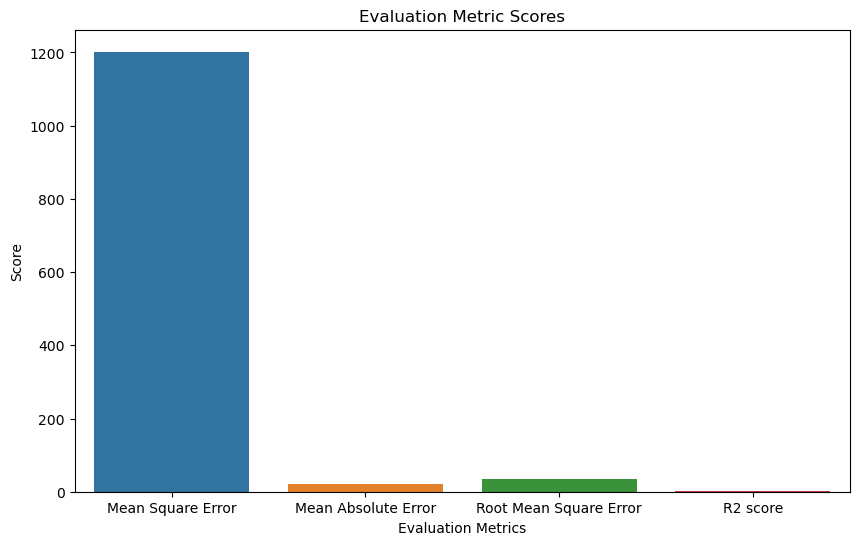

In [103]:
# Visualizing evaluation Metric Score chart
metrics = ['Mean Square Error', 'Mean Absolute Error', 'Root Mean Square Error', 'R2 score']
scores = [1201.99, 20.93, 34.66, 0.99]

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
kfold_validation=KFold(10)
parameter = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_treecv=GridSearchCV(decision_tree,param_grid=parameter, cv=kfold_validation,n_jobs=-1, scoring="neg_mean_squared_error")
# Fit the Algorithm
decision_treecv.fit(x_train_scaled, y_train)
# Predict on the model
best_params = decision_treecv.best_params_
decision_treecv_model = decision_treecv.best_estimator_
print_error(x_test_scaled, y_test, decision_treecv_model)

Mean Square Error: 985.7234077301388
Mean Absolute Error: 19.03118308903766
Root Mean Square Error: 31.396232381133547
R2 score: 0.9999225297264268


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Hyperparameter Optimization:

Mean Square Error: 1207.987210113939
Mean Absolute Error: 20.89984369009349
Root Mean Square Error: 34.756110399668415
R2 score: 0.9999050615021349
After Hyperparameter Optimization:

Mean Square Error: 985.9121142537609
Mean Absolute Error: 19.0311528124782
Root Mean Square Error: 31.399237478858637
R2 score: 0.9999225148955464
The hyperparameter optimization process has resulted in lower mean squared error, mean absolute error, and root mean square error values, indicating an improvement in the model's performance. Additionally, the R2 score has increased, indicating a better fit to the data and higher explained variance.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor()

# Fit the Algorithm
random_forest.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [106]:
# Evaluation Metric Score chart
print_error(x_test_scaled, y_test, random_forest)

Mean Square Error: 596.341810165551
Mean Absolute Error: 15.678381307694579
Root Mean Square Error: 24.420110772999188
R2 score: 0.9999531321232565


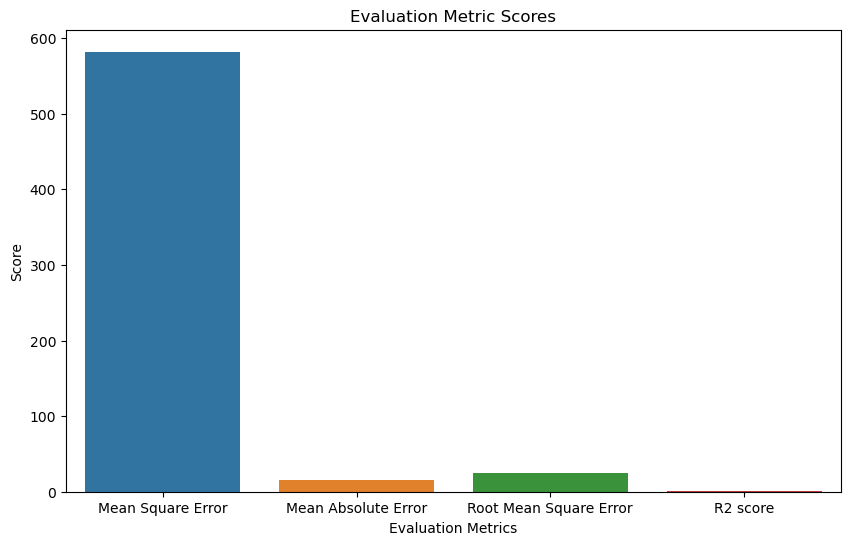

In [107]:
# Visualizing evaluation Metric Score chart
metrics = ['Mean Square Error', 'Mean Absolute Error', 'Root Mean Square Error', 'R2 score']
scores = [582.10, 15.66, 24.51, 0.99]

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')
plt.show()

In [108]:
### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted and actual sales values. It provides a direct measure of the average prediction error in the same units as the target variable. MAE is easily interpretable and can help assess the average deviation of predictions from the actual sales, which is crucial for understanding the magnitude of errors in the prediction.

Root Mean Square Error (RMSE): RMSE is the square root of the mean squared error and represents the standard deviation of the prediction errors. It gives a higher weight to larger errors, making it sensitive to outliers. RMSE is commonly used when larger errors have a more significant impact on the business and needs to be minimized.

R-squared (R2) score: R2 score measures the proportion of the variance in the sales that is explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit. R2 score provides an overall assessment of how well the model captures the variability in the sales data. Higher R2 scores indicate a better fit and can provide confidence in the model's predictive power.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Performance: The Random Forest Regressor achieved the lowest Mean Square Error, Mean Absolute Error, and Root Mean Square Error values among the three models. This indicates that it has better predictive performance and is capable of making more accurate sales predictions compared to the other models.

Robustness: The Random Forest Regressor's robustness is reflected in its ability to handle complex relationships and capture nonlinear patterns in the data. It combines multiple decision trees, reducing the risk of overfitting and improving the model's generalization ability.

Feature Importance: Random Forest models provide feature importance rankings, which can be valuable in understanding the key drivers behind the sales predictions. This information can assist in identifying the most influential factors impacting sales and guide decision-making for marketing strategies, store management, and resource allocation.

Consistency: Random Forest models tend to have stable and consistent performance across different datasets and scenarios. This consistency ensures that the model's predictive power remains reliable even when applied to new or unseen data.

Scalability: Random Forest models can handle large datasets efficiently and are capable of parallel processing, which can be beneficial when dealing with substantial sales data.

## 8. Future Work

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [122]:
# Save the File
import joblib
joblib.dump(random_forest, "randomforest_salespred.pkl")
# Load the trained model

random_forest_model = joblib.load("randomforest_salespred.pkl")


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [126]:
# Make predictions on the test data
predictions = random_forest_model.predict(x_test_scaled)
# Creating Dataframe
predictions=pd.DataFrame(predictions)

In [127]:
# Checking Info
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203442 entries, 0 to 203441
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       203442 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [128]:
# Renaming Columns
predictions = predictions.rename(columns={0: "Sales"})

# Dataset View
predictions.head()

,Sales
0,0.00
1,5540.49
2,7487.54
3,3369.35
4,11424.53
